In [2]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
from integratermodule import takeintegral

importing Jupyter notebook from integratermodule.ipynb


In [3]:
#Declaring variables and time
wetmass=1
propellant=0.094
burntime=3.600
totalimpulse=55.400

drymass=wetmass-propellant
averagethrust=totalimpulse/burntime
massflowrate=propellant/burntime

time=np.linspace(0,20,1000, False)

In [14]:
# Calculations of thrust, mass, acceleration vectors
index=int(np.where(time==burntime)[0] +1)

altitude=np.linspace(0,100000,1000)
gravity = ((6.6743 * 10**(-11) * 5.9721 * 10**24) / (6371000 + altitude)**2)

thrust=np.append(np.repeat(averagethrust, index), np.repeat(0, len(time)-index))

mass=np.append(np.repeat(wetmass, index) - time[0:index]*massflowrate, np.repeat(drymass, len(time)-index))

acceleration=thrust/mass - 9.81

# Calculations of velocity and displacement with trapezoid rule using "takeintegal" module
velocity= takeintegral(time, acceleration)

displacement= takeintegral(time, velocity)
displacement = np.maximum(displacement, 0)
ground=np.where(displacement==0)

velocity[ground]=0
acceleration[ground]=0

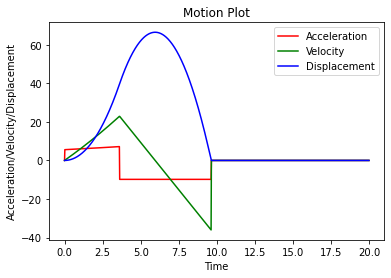

[9.82013786 9.81982928 9.81952072 9.81921217 9.81890364 9.81859512
 9.81828661 9.81797812 9.81766965 9.81736119 9.81705274 9.81674431
 9.81643589 9.81612749 9.8158191  9.81551072 9.81520236 9.81489402
 9.81458569 9.81427737 9.81396907 9.81366079 9.81335251 9.81304426
 9.81273601 9.81242778 9.81211957 9.81181137 9.81150318 9.81119501
 9.81088686 9.81057872 9.81027059 9.80996248 9.80965438 9.8093463
 9.80903823 9.80873017 9.80842213 9.80811411 9.8078061  9.8074981
 9.80719012 9.80688215 9.8065742  9.80626626 9.80595833 9.80565043
 9.80534253 9.80503465 9.80472678 9.80441893 9.8041111  9.80380327
 9.80349547 9.80318767 9.80287989 9.80257213 9.80226438 9.80195664
 9.80164892 9.80134122 9.80103352 9.80072585 9.80041818 9.80011053
 9.7998029  9.79949528 9.79918768 9.79888009 9.79857251 9.79826495
 9.7979574  9.79764987 9.79734235 9.79703485 9.79672736 9.79641988
 9.79611242 9.79580498 9.79549755 9.79519013 9.79488273 9.79457534
 9.79426796 9.79396061 9.79365326 9.79334593 9.79303862 9.792731

In [15]:
#Plotting acceleration, velocity and displacement by time in same graph
plt.plot(time, acceleration, 'r', label='Acceleration')
plt.plot(time, velocity, 'g', label='Velocity')
plt.plot(time, displacement, 'b', label='Displacement')

plt.xlabel('Time')
plt.ylabel('Acceleration/Velocity/Displacement')
plt.title('Motion Plot')
plt.legend()

plt.show()
print(gravity)